<h1 align="center">CNN for beginners (Pneumonia X-Ray)</h1>

### Hello, I'm Prathish and a beginner at CNN. My aim of this project is to learn to use CNN properly and to serve this notebook as a guide to my fellow beginners. Let's Start.

In [1]:
#Import the necessary libraries

import numpy as np # linear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

# Let us explore the directory we are woking on
mainDIR = os.listdir('../input/chest-xray-pneumonia/chest_xray')
print(mainDIR)


['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [2]:
# To check the number of pneumonia images in train
basedir = '../input/chest-xray-pneumonia/chest_xray/'
print(len(os.listdir('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')))  

3875


## Create the path for test, val and train


In [3]:
train_folder = basedir + 'train/'
val_folder   = basedir + 'val/'
test_folder  = basedir + 'test/'

print(train_folder)
print(val_folder)
print(test_folder)

../input/chest-xray-pneumonia/chest_xray/train/
../input/chest-xray-pneumonia/chest_xray/val/
../input/chest-xray-pneumonia/chest_xray/test/


In [4]:
# Now similarly for the pneumonia and the normal class
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

print(len(os.listdir(train_p)))
# We have 3875 images with pneumonia

3875


### Now let us look at some of the images

Text(0.5, 1.0, 'Pneumonia')

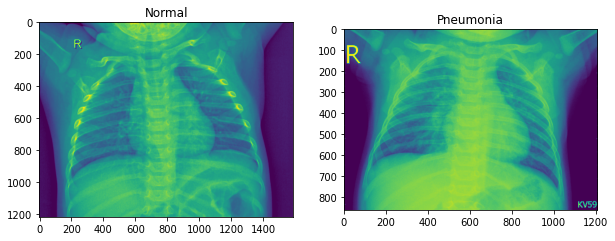

In [5]:
norm_pic = train_n + os.listdir(train_n)[69]  
pneu_pic = train_p + os.listdir(train_p)[69] #This 69 is random, you can give whatever number from 0-3875

norm_disp = Image.open(norm_pic)
pneu_disp = Image.open(pneu_pic)

#Let's plot these images

f = plt.figure(figsize= (10,10))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_disp)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_disp)
a2.set_title('Pneumonia')


#### Seems like its really hard to distinguish between the Normal and the Pneumonia through naked eye. 
#### But fret not, we have our CNN to take care of it.

## Building CNN
### We will now construct a CNN using Keras. Keras is a high level deep learning library and runs on top of tensorflow

In [6]:
# Keras Libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#What flows between layers are tensors. Tensors can be seen as matrices, with shapes.

#In Keras, the input layer itself is not a layer, but a tensor. 
#It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.

#Pooling ==> Reduces the size of layer, max pooling is the go-to
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


2022-07-20 17:15:37.657166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:15:37.807667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:15:37.808646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 17:15:37.810508: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### The model's skeleton has be built, now we need to process the data and feed it to the model.

In [8]:
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(shear_range=20, rescale= 1./255, zoom_range=0.2,horizontal_flip = True)

#Normalize the test data
test_datagen = ImageDataGenerator(rescale= 1./255) 

In [9]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [10]:
#Now we need to feed those images in the directory to the ImageDataGenerator, which will be fed into the model
training_set = train_datagen.flow_from_directory(train_folder, target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Now let us fit the model with the images

In [12]:
cnn_model = cnn.fit_generator(training_set, steps_per_epoch= len(training_set) , epochs = 3, 
                              validation_data=validation_set, validation_steps= len(test_set) )
#The steps_per_epoch and validation_steps are random, you can play around those and set your number

2022-07-20 17:15:45.303932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3


2022-07-20 17:15:47.262847: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 100s 570ms/step - loss: 0.3895 - accuracy: 0.8259 - val_loss: 0.3171 - val_accuracy: 0.9375
Epoch 2/3
163/163 [==============================] - 57s 353ms/step - loss: 0.2600 - accuracy: 0.8923
Epoch 3/3
163/163 [==============================] - 58s 354ms/step - loss: 0.2221 - accuracy: 0.9109


## We are getting a good accuracy and even better validation accuaracy of 93%
## Now lets predict for test images


In [13]:
Y_pred = cnn.predict_generator(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)


## Let's see how accuracy changed over our training and Validation Set and also how our Loss function changed!!

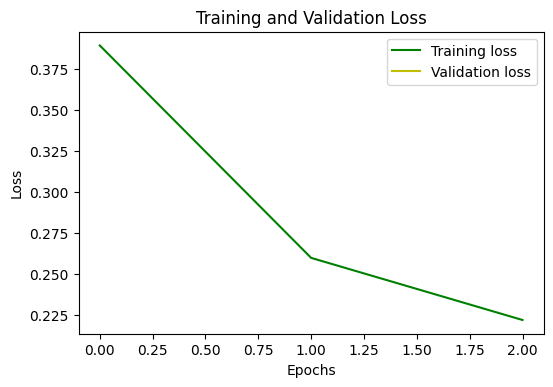

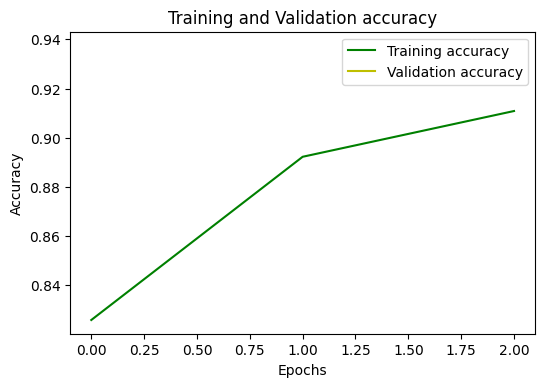

In [14]:
## plot loss for train and Validation
loss_train = cnn_model.history['loss']
loss_val = cnn_model.history['val_loss']
plt.figure(figsize=(6,4), dpi=100)
plt.plot(loss_train, 'g', label = 'Training loss')
plt.plot(loss_val, 'y', label = 'Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## plot loss for train and Validation
loss_train = cnn_model.history['accuracy']
loss_val = cnn_model.history['val_accuracy']
plt.figure(figsize=(6,4), dpi=100)
plt.plot( loss_train, 'g', label = 'Training accuracy')
plt.plot( loss_val, 'y', label = 'Validation accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Hope you have understood the code and followed it well. If you have any questions or queries, I would be glad to help. Drop down a comment and upvote!
# Thanks
## By Prathish Murugan